In [21]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [4]:
def loadData():
    xTrain=[]
    yTrain=[]
    xTest=[]
    yTest=[]
    
    for i in ['./cifar-10-batches-py/data_batch_1','./cifar-10-batches-py/data_batch_2','./cifar-10-batches-py/data_batch_3','./cifar-10-batches-py/data_batch_4','./cifar-10-batches-py/data_batch_5']:
        file = open(i,'rb')
        data = pickle.load(file,encoding='bytes')
        xTrain += list(data[b'data'])
        yTrain += data[b'labels']
    
    file = open('./cifar-10-batches-py/test_batch','rb')
    data = pickle.load(file,encoding='bytes')
    xTest += list(data[b'data'])
    yTest += data[b'labels']
    
    files2 = open('./cifar-10-batches-py/batches.meta','rb')
    data = pickle.load(files2,encoding='bytes')
    labels = [i.decode('utf-8') for i in data[b'label_names']]
    
    return np.array(xTrain),np.array(yTrain),np.array(xTest),np.array(yTest),np.array(labels)
        

In [5]:
xTrain,yTrain,xTest,yTest,labels = loadData()

In [6]:
print(xTrain.shape,yTrain.shape,xTest.shape,yTest.shape,labels)


(50000, 3072) (50000,) (10000, 3072) (10000,) ['airplane' 'automobile' 'bird' 'cat' 'deer' 'dog' 'frog' 'horse' 'ship'
 'truck']


Printing images of  airplane
(3072,)


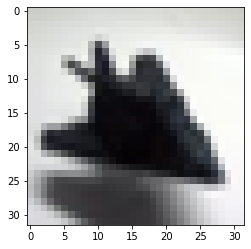

(3072,)


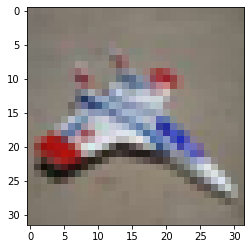

(3072,)


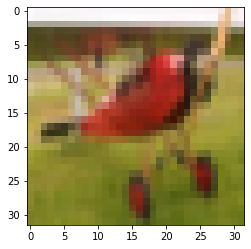

(3072,)


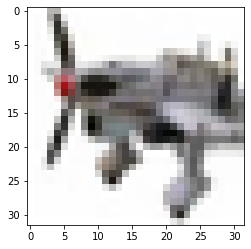

(3072,)


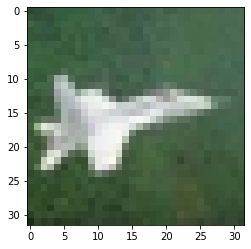

Printing images of  automobile
(3072,)


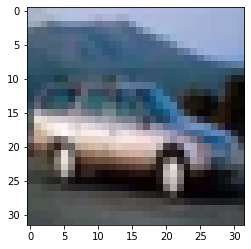

(3072,)


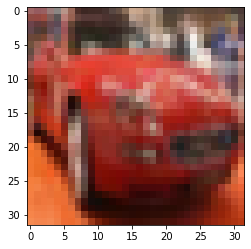

(3072,)


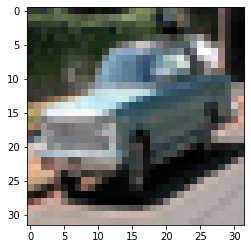

(3072,)


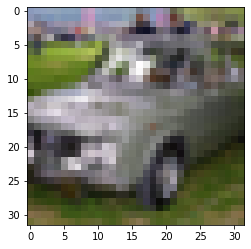

(3072,)


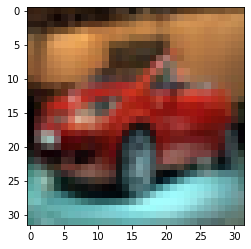

Printing images of  bird
(3072,)


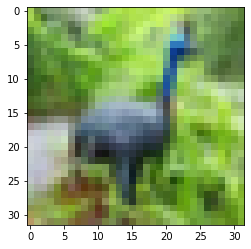

(3072,)


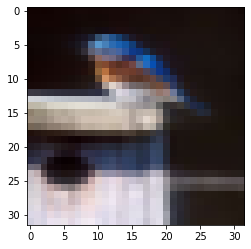

(3072,)


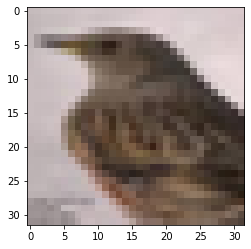

(3072,)


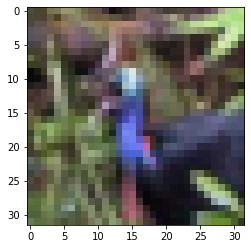

(3072,)


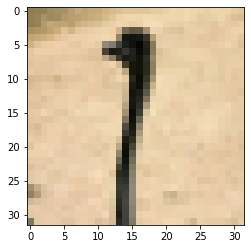

Printing images of  cat
(3072,)


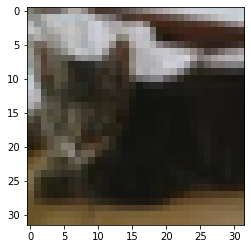

(3072,)


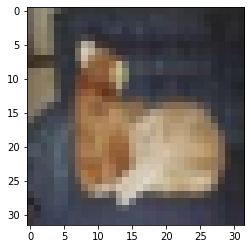

(3072,)


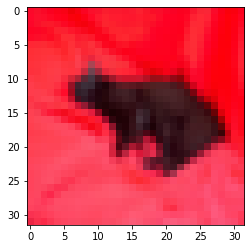

(3072,)


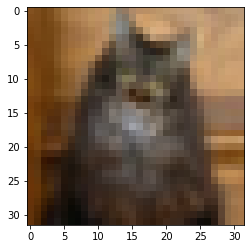

(3072,)


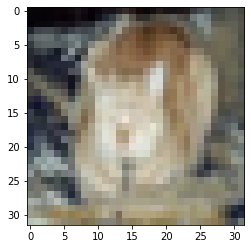

Printing images of  deer
(3072,)


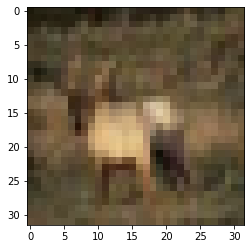

(3072,)


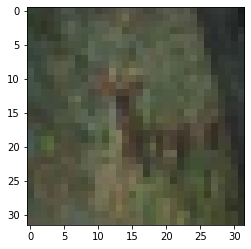

(3072,)


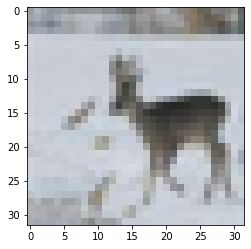

(3072,)


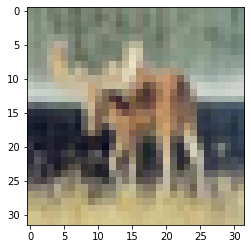

(3072,)


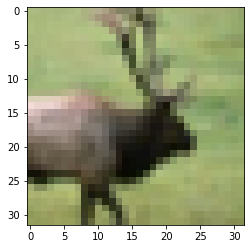

Printing images of  dog
(3072,)


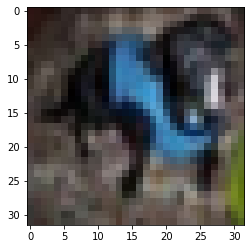

(3072,)


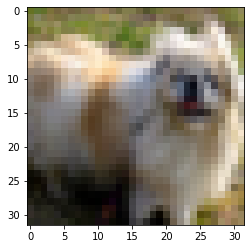

(3072,)


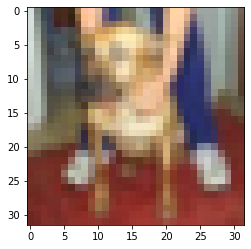

(3072,)


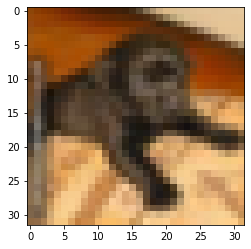

(3072,)


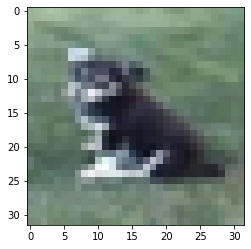

Printing images of  frog
(3072,)


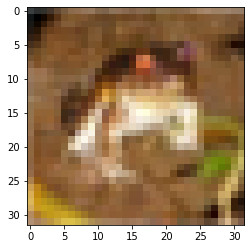

(3072,)


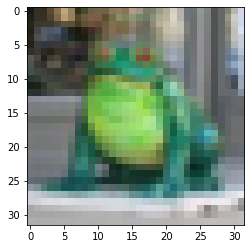

(3072,)


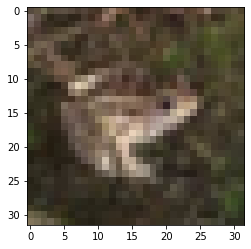

(3072,)


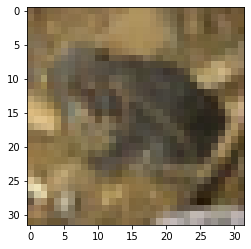

(3072,)


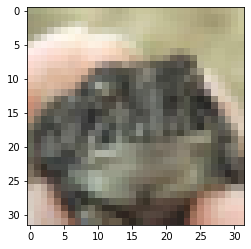

Printing images of  horse
(3072,)


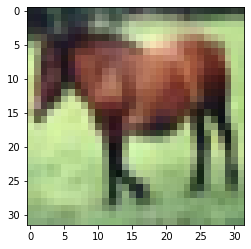

(3072,)


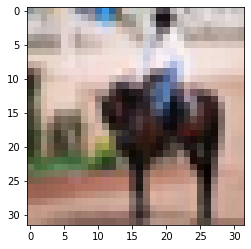

(3072,)


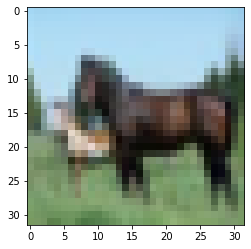

(3072,)


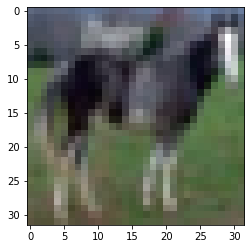

(3072,)


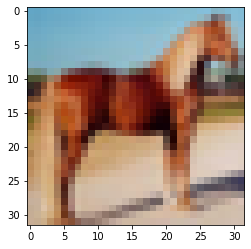

Printing images of  ship
(3072,)


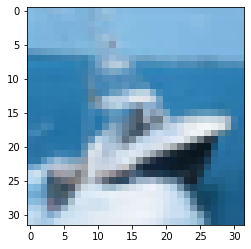

(3072,)


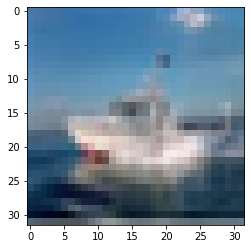

(3072,)


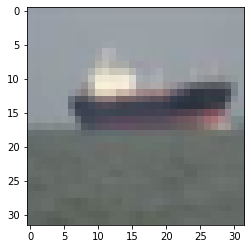

(3072,)


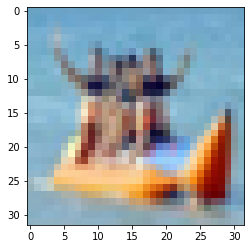

(3072,)


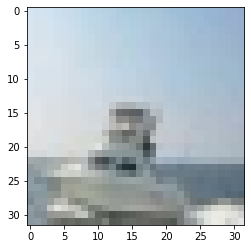

Printing images of  truck
(3072,)


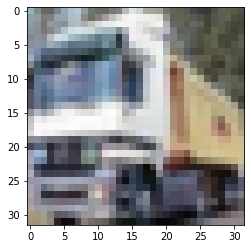

(3072,)


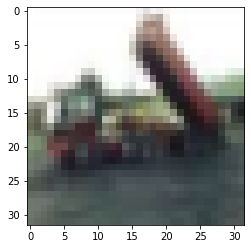

(3072,)


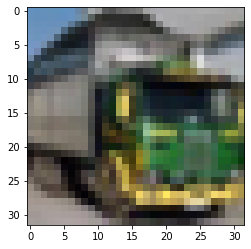

(3072,)


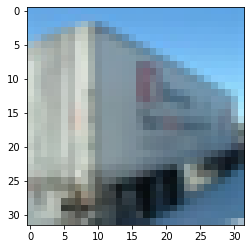

(3072,)


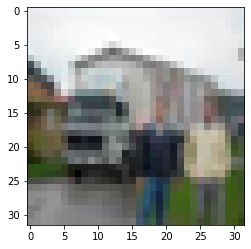

In [19]:
#visualising as images
images = xTrain.reshape(len(xTrain),3,32,32).transpose(0,2,3,1)
for i in range(10):
    imageInd = np.where(yTrain==i)[0]
    fiveImageInd = imageInd[:5]
    print("Printing images of ",labels[yTrain[fiveImageInd[0]]])
    for j in fiveImageInd:
        plt.imshow(images[j])
        plt.show()

In [20]:
#LDA
clf = LinearDiscriminantAnalysis()
clf.fit(xTrain,yTrain)
print("Accuracy on testing data - ",clf.score(xTest,yTest))

Accuracy on testing data -  0.3713


In [22]:
yPredict = clf.predict(xTest)
matrix = confusion_matrix(yTest, yPredict)
accuracyClass = matrix.diagonal()/matrix.sum(axis=1)
for i in range(len(labels)):
    print("Accuracy for class "+labels[i]+" = ",accuracyClass[i])

Accuracy for class airplane =  0.463
Accuracy for class automobile =  0.415
Accuracy for class bird =  0.255
Accuracy for class cat =  0.245
Accuracy for class deer =  0.271
Accuracy for class dog =  0.329
Accuracy for class frog =  0.413
Accuracy for class horse =  0.404
Accuracy for class ship =  0.494
Accuracy for class truck =  0.424
